# Solución Ejercicio 3.4 de la Guía 2 de Econometría 
# Universidad Ean

04 de Septiembre del 2022

Ejercicio realizado por: 

Cristian Stiven Romero Bustos 

Ruben Andres Solano Corredor

Ana María Espitia Lopez

# 3.4. Use la base de datos Birthweight_Smoking para responder las siguientes preguntas:

# Desarrollo punto 3.4

In [3]:
#Importamos las librerias iniciales
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Leemos los datos de Stata y armamos nuestro Dataframe y lo llamamos df
df = pd.read_stata('birthweight_smoking.dta')
#Visualisamos las variables y su información general
print("# de Registros, # de Columnas", df.shape)
df.head()

# de Registros, # de Columnas (3000, 12)


,nprevist,alcohol,tripre1,tripre2,tripre3,tripre0,birthweight,smoker,unmarried,educ,age,drinks
0,12,0,1,0,0,0,4253.0,1.0,1.0,12.0,27.0,0.0
1,5,0,0,1,0,0,3459.0,0.0,0.0,16.0,24.0,0.0
2,12,0,1,0,0,0,2920.0,1.0,0.0,11.0,23.0,0.0
3,13,0,1,0,0,0,2600.0,0.0,0.0,17.0,28.0,0.0
4,9,0,1,0,0,0,3742.0,0.0,0.0,13.0,27.0,0.0


# i.Regrese Birthweight sobre Smoker.

# Respuesta:

Pendiente Estimada (m) [-0.00011296]
Intercepto Estimado (b) 0.5761246
unmarried     -0.203235
smoker        -0.169127
tripre0       -0.123500
tripre2       -0.066714
tripre3       -0.046495
alcohol       -0.033647
drinks        -0.032409
age            0.080073
educ           0.105207
tripre1        0.112377
nprevist       0.227360
birthweight    1.000000
Name: birthweight, dtype: float64


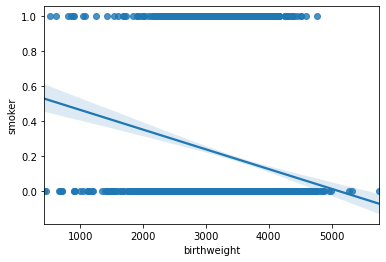

In [5]:
from sklearn import linear_model
regresion = linear_model.LinearRegression()
birthweight = df['birthweight'].values.reshape((-1, 1))
modelo = regresion.fit(birthweight, df['smoker'])
print("Pendiente Estimada (m)", modelo.coef_)
print("Intercepto Estimado (b)", modelo.intercept_)

#Regresión y linea de tendencia
sns.regplot(x='birthweight',y='smoker',data=df)

#Correlación
print(df.corr()['birthweight'].sort_values())

# a. ¿Cuál es el efecto estimado de smoking sobre birth weight?

# Respuesta:

Pendiente Estimada (m) [-253.22856]
Intercepto Estimado (b) 3432.06
Correlaciones de Smoker: educ          -0.232645
birthweight   -0.169127
age           -0.143765
tripre1       -0.131505
nprevist      -0.108635
tripre0        0.060830
tripre3        0.079249
tripre2        0.088875
drinks         0.091995
alcohol        0.120898
unmarried      0.237744
smoker         1.000000
Name: smoker, dtype: float64


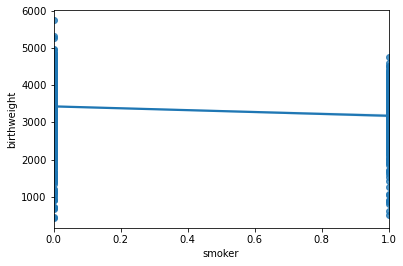

In [6]:
#Aquí la logica es x= Smoker y= birthweight

from sklearn import linear_model
regresion = linear_model.LinearRegression()
smoker = df['smoker'].values.reshape((-1, 1))
modelo = regresion.fit(smoker, df['birthweight'])
print("Pendiente Estimada (m)", modelo.coef_)
print("Intercepto Estimado (b)", modelo.intercept_)

#Regresión y linea de tendencia
sns.regplot(x='smoker',y='birthweight',data=df)

#Correlación
print('Correlaciones de Smoker:', df.corr()['smoker'].sort_values())

Es Importante recalcar que hay una relación inversamente proporcional que se fundamenta con la tendencia de la linea y su pendiente de [-253.22856] adicional, la correlación es de -16,91% 

# ii.Regrese Birthweight sobre Smoker, Alcohol, y Nprevist

In [7]:
df1 = df

In [8]:
# Preparación de datos iniciales
X = df1.drop(['birthweight', 'tripre1', 'tripre2', 'tripre0', 'tripre3', 'unmarried', 'educ', 'age', 'drinks'], axis=1)
y = df1['birthweight']

In [9]:
X.head()

,nprevist,alcohol,smoker
0,12,0,1.0
1,5,0,0.0
2,12,0,1.0
3,13,0,0.0
4,9,0,0.0


In [10]:
y.head()

0    4253.0
1    3459.0
2    2920.0
3    2600.0
4    3742.0
Name: birthweight, dtype: float32

In [11]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
iiregresion = linear_model.LinearRegression()
X.values.reshape((-1, 1))
modelo = iiregresion.fit(X, y)
print("Pendiente Estimada (m) nprevist, alcohol, smoker", modelo.coef_)
print("Intercepto Estimado (b)", modelo.intercept_)



Pendiente Estimada (m) nprevist, alcohol, smoker [  34.069912  -30.491383 -217.58006 ]
Intercepto Estimado (b) 3051.2485


In [12]:
y_pred=[8,  0,  1]

In [13]:
#Predicción de Jane
print(modelo.predict([y_pred]))

[3106.22776794]


In [14]:
y_pred_all = modelo.predict(X)

In [15]:
from sklearn.metrics import r2_score
r2_score(y, y_pred_all)

0.07285029165983248

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred_all)

325003.06